In [1]:
import numpy as np
import numpy.random as random
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp

import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline
%precision 3

'%.3f'

In [2]:
import requests,zipfile
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [3]:
bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
bank.shape

(45211, 17)

In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [11]:
bank_int= bank.select_dtypes(include=int)
bank_int.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [12]:
bank_int_corr = bank_int.corr()
bank_int_corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


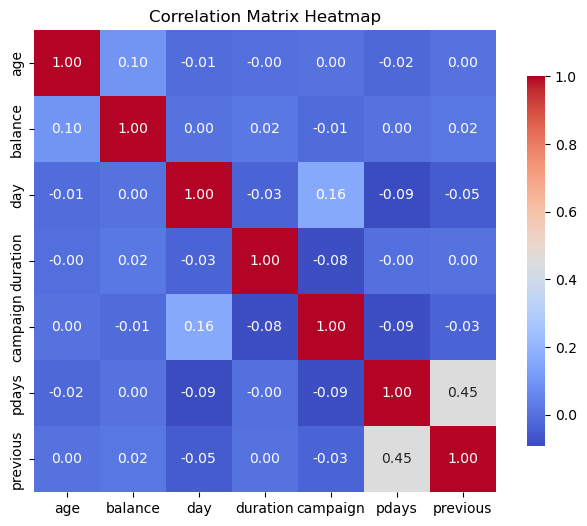

In [13]:
# ヒートマップの描画
plt.figure(figsize=(8, 6))  # 図のサイズを指定
sns.heatmap(bank_int_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix Heatmap')
plt.show()

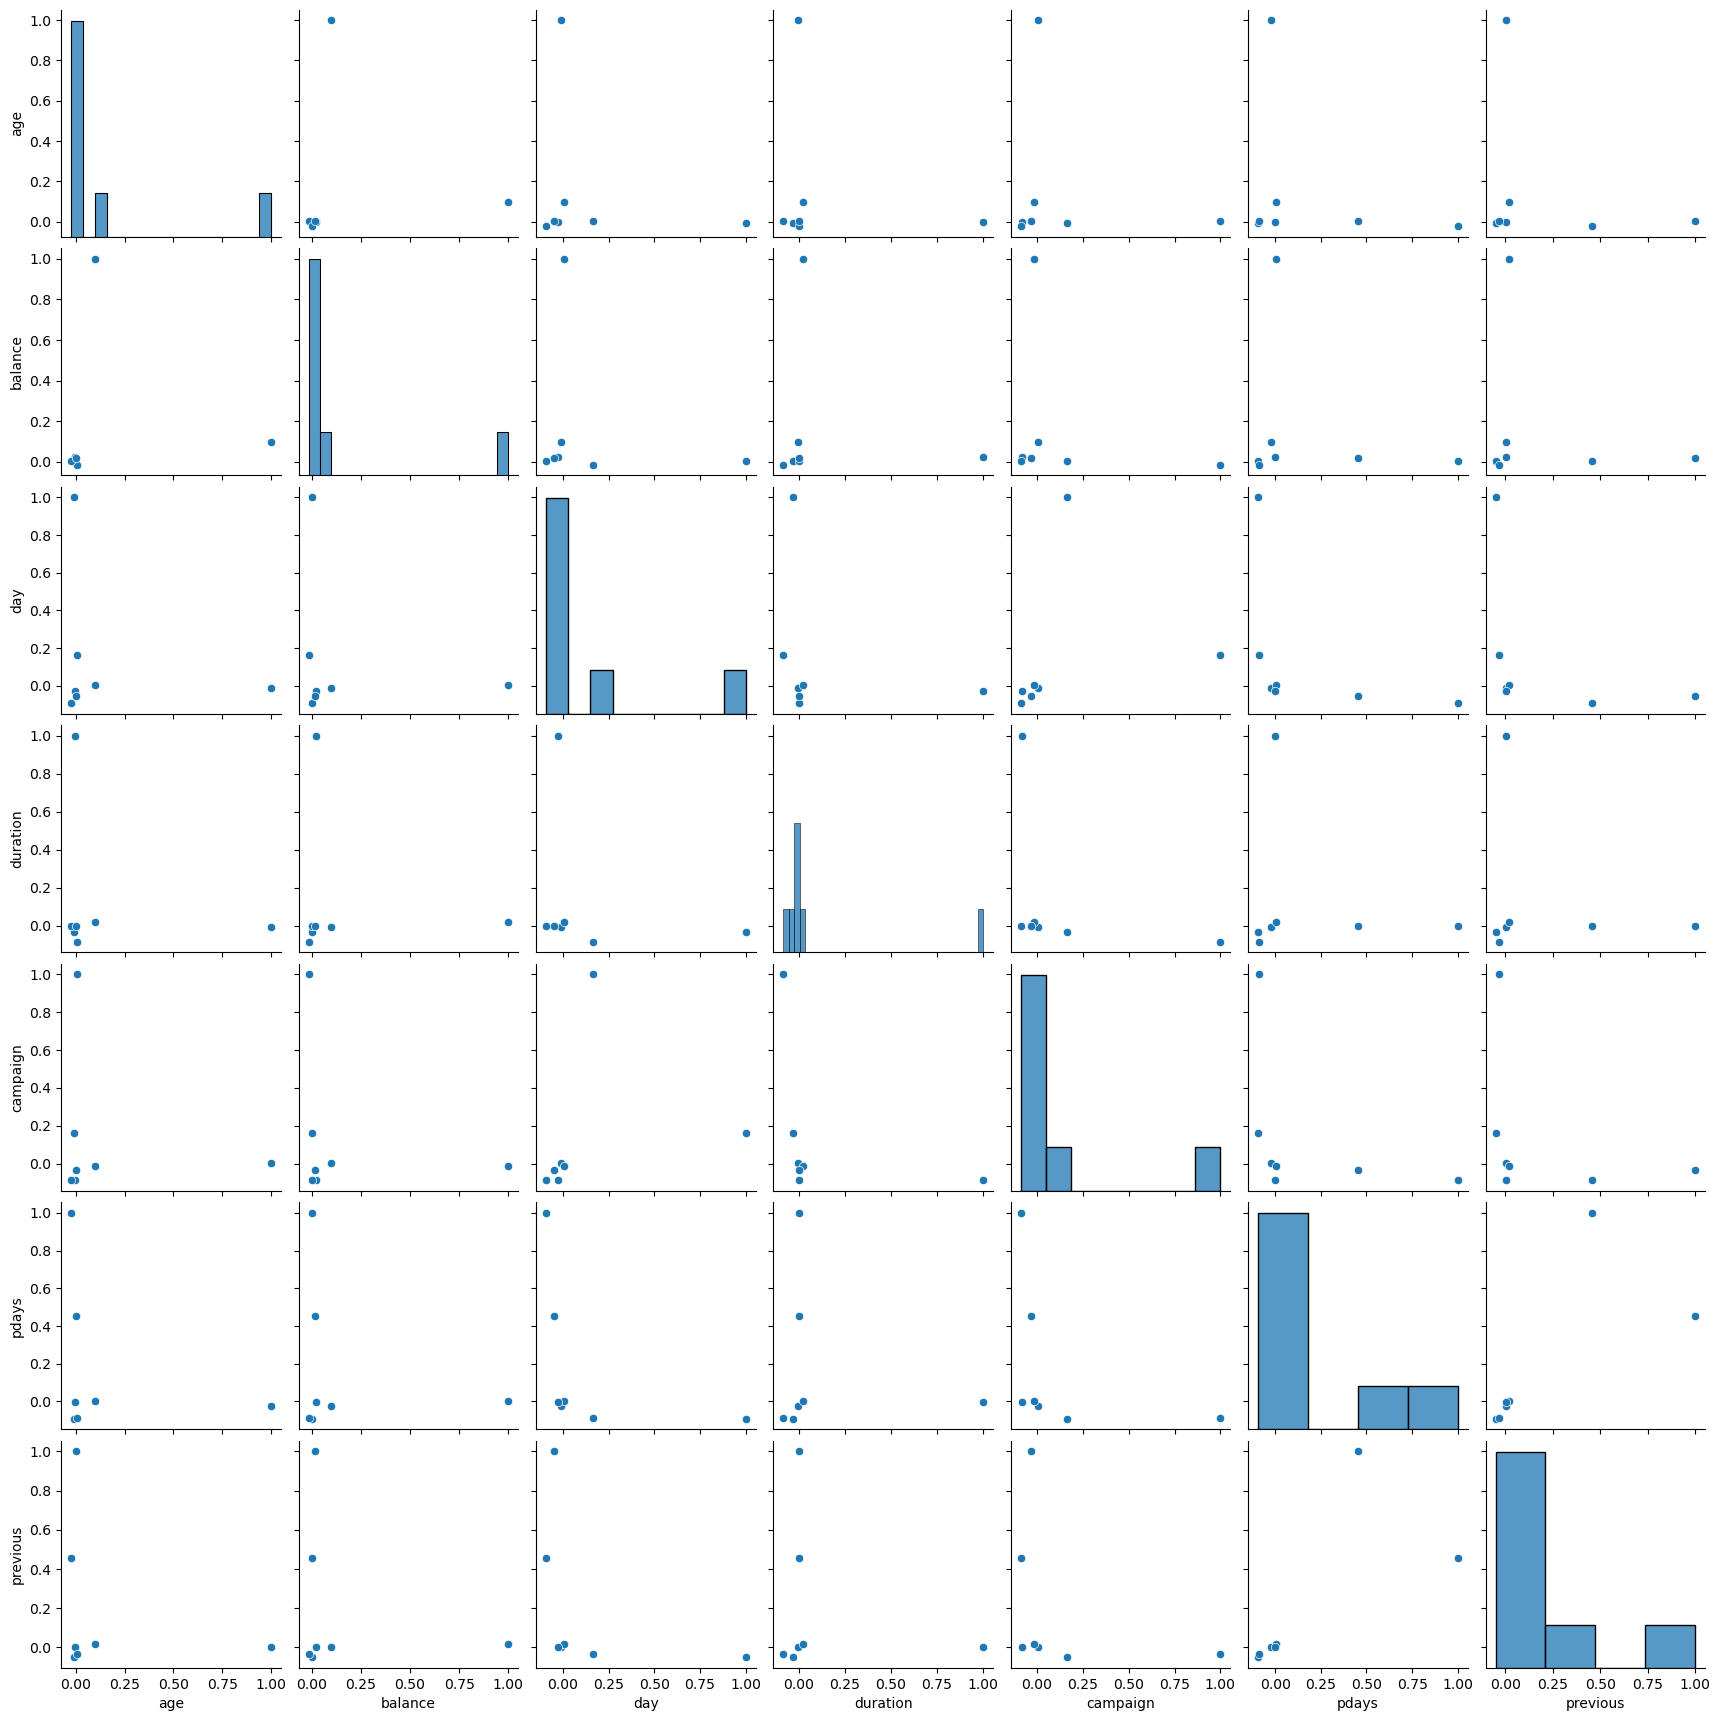

In [16]:
sns.pairplot( bank_int_corr )

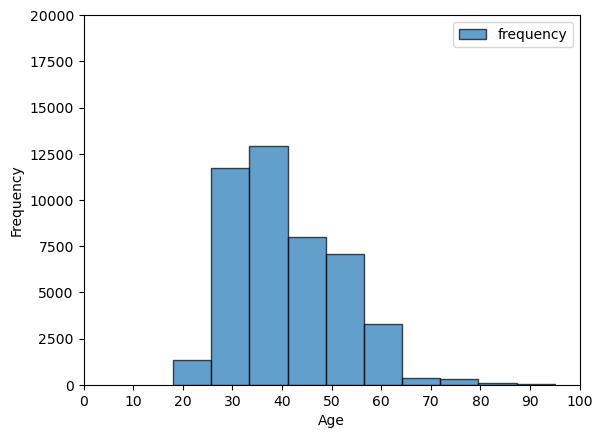

In [29]:
plt.hist(bank["age"], 
         bins=10, 
         label="frequency", 
         edgecolor="black", 
         alpha=0.7)  
plt.xlabel("Age")
plt.ylabel("Frequency")


plt.xlim(0, 100) 
plt.xticks(range(0, 101, 10)) 

# y軸の範囲を設定
plt.ylim(0, 20000)

plt.legend()
plt.show()

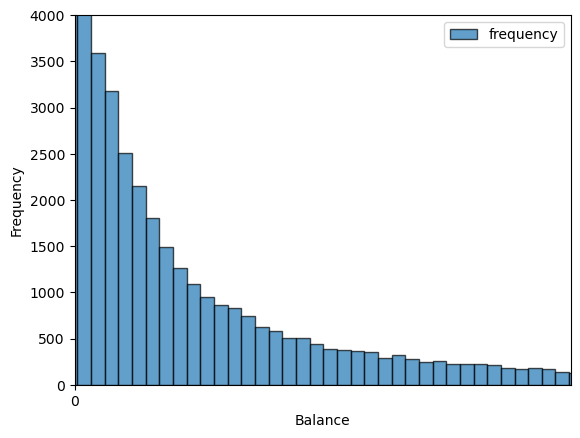

In [35]:
plt.hist(bank["balance"], 
         bins=1000, 
         label="frequency", 
         edgecolor="black", 
         alpha=0.7)  
plt.xlabel("Balance")
plt.ylabel("Frequency")

plt.xlim(0, 4000) 
plt.xticks(range(0, 4001, 10000)) 

# y軸の範囲を設定
plt.ylim(0, 4000)

plt.legend()
plt.show()

In [30]:
bank_int.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [38]:
bank.count(axis=0)

age          45211
job          45211
marital      45211
education    45211
default      45211
balance      45211
housing      45211
loan         45211
contact      45211
day          45211
month        45211
duration     45211
campaign     45211
pdays        45211
previous     45211
poutcome     45211
y            45211
dtype: int64

In [42]:
bank.groupby('age').count().head(50)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
18,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
19,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
20,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
21,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79
22,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129,129
23,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202
24,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302,302
25,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527,527
26,805,805,805,805,805,805,805,805,805,805,805,805,805,805,805,805


In [47]:
bank.groupby('age').count().tail(27)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
68,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
69,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
70,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67
71,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54
72,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52,52
73,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
74,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
75,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
76,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


In [54]:
bank.groupby(['age', 'job']).mean(numeric_only=True)

balance        day    duration  campaign      pdays  \
age job                                                                    
18  student       372.416667  11.833333  214.166667  1.750000  29.083333   
19  student       539.771429  12.514286  175.485714  2.914286  48.685714   
20  admin.        201.000000  12.000000  104.000000  1.500000  -1.000000   
    blue-collar   114.000000  16.500000  391.250000  1.750000  -1.000000   
    services     -103.000000  13.000000  180.000000  1.000000  -1.000000   
...                      ...        ...         ...       ...        ...   
90  retired       356.500000   8.000000  354.500000  2.000000  -1.000000   
92  retired       775.000000  24.000000  238.500000  3.500000  47.500000   
93  retired       775.000000  13.000000  668.000000  2.000000  95.000000   
94  retired      1234.000000   3.000000  212.000000  1.000000  -1.000000   
95  retired      1141.000000  11.000000  211.000000  9.000000  -1.000000   

                 previous  
age job                    
18  student      0.500000  
19  student      0.628571  
20  admin.       0.000000  
    blue-collar  0.000000  
    services     0.000000  
...                   ...  
90  retired      0.000000  
92  retired      1.500000  
93  retired      8.000000  
94  retired      0.000000  
95  retired      0.000000  

[596 rows x 6 columns]